# CHAPTER 6: THE ART OF DATA VISUALIZATION
**(Week 9-10: Lecture Notes)**

---

## 1. INTRODUCTION: WHY VISUALIZE?

The human brain has evolved to process shapes and colors, not raw numbers.

*   **10,000-row Excel sheet:** It takes hours to find a single error.
*   **A Line Chart:** You notice the sudden drop (the error) in 1 second.

> **Data Scientist's Slogan:** "One chart is worth a thousand rows of data."

**Tools We Will Use:**

1.  **Matplotlib:** The grandfather of Python visualization. It draws everything, but the code is verbose. *(Like a manual transmission car, you have full control).*
2.  **Seaborn:** Built on top of Matplotlib. Draws aesthetic and statistical charts with less code. *(Automatic transmission, comfortable).*

---
# WEEK 9: MATPLOTLIB (BASICS AND CONTROL)

Matplotlib is Python's fundamental plotting library.

## 9.1. LIBRARY INSTALLATION AND LOGIC

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data Preparation (Engineering Example: Time vs. Temperature)
time = np.arange(0, 10, 1)  # From 0 to 9
temp = [20, 22, 25, 30, 35, 34, 30, 28, 25, 22]

## 9.2. BASIC PLOTTING (The Simplest Method)

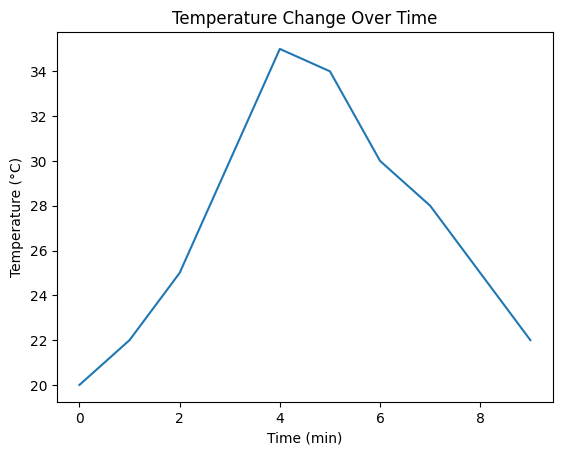

In [2]:
plt.plot(time, temp)
plt.title("Temperature Change Over Time")
plt.xlabel("Time (min)")
plt.ylabel("Temperature (°C)")
plt.show() # Renders the plot on the screen

---
## 9.3. FIGURE AND AXES LOGIC (The Professional Method)

There are two approaches in Matplotlib:

1.  **State-based:** `plt.plot()` (Like above, fast but limited).
2.  **Object-Oriented (OO):** `fig, ax = plt.subplots()` (The one engineers use).

**Analogy:**
*   **Figure (Fig):** The entire canvas/paper.
*   **Axes (Ax):** The plot area drawn on the paper. (One paper can hold multiple plots).

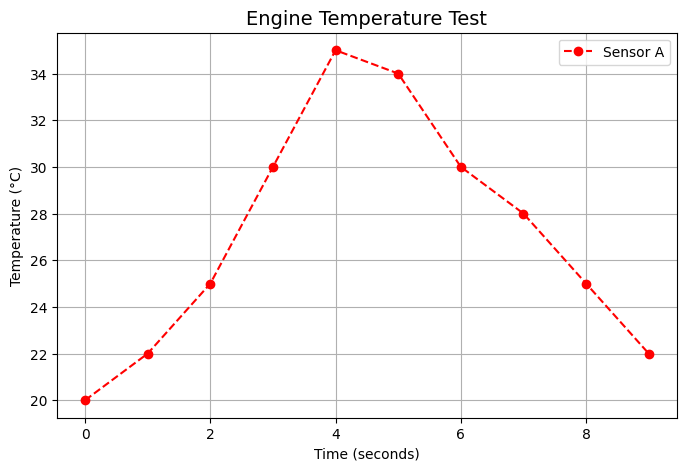

In [3]:
# Professional Plotting Template
fig, ax = plt.subplots(figsize=(8, 5)) # Canvas size: 8x5 inches

# Add Data
ax.plot(time, temp, color="red", linestyle="--", marker="o", label="Sensor A")

# Decorations (Using 'set' commands)
ax.set_title("Engine Temperature Test", fontsize=14)
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Temperature (°C)")
ax.legend() # Show the label
ax.grid(True) # Add grid lines

plt.show()

---
## 9.4. MULTIPLE PLOTS (SUBPLOTS)

In engineering, we often compare multiple signals side-by-side (e.g., Speed and RPM).

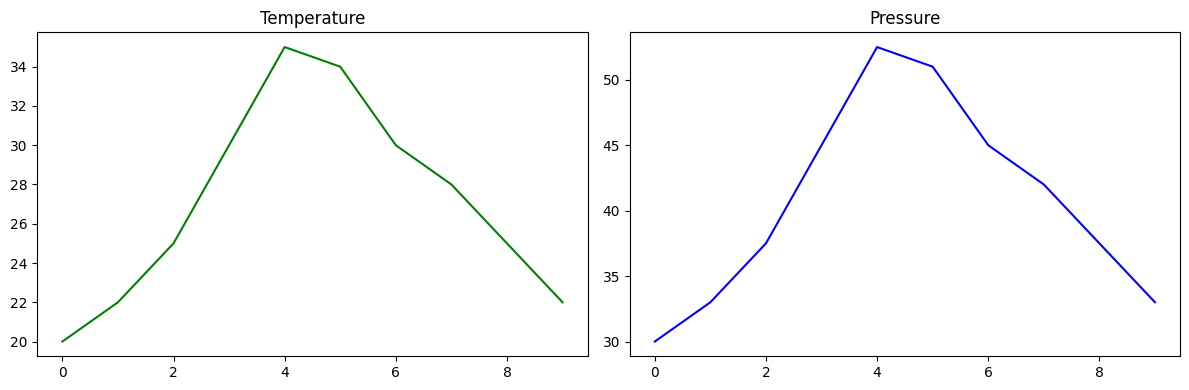

In [4]:
# Layout: 1 Row, 2 Columns (2 plots side-by-side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# First Plot (Left)
ax1.plot(time, temp, 'g') # 'g' = green
ax1.set_title("Temperature")

# Second Plot (Right) - Let's plot the square of the data (Pressure simulation)
pressure = np.array(temp) * 1.5
ax2.plot(time, pressure, 'b') # 'b' = blue
ax2.set_title("Pressure")

plt.tight_layout() # Adjusts spacing so plots don't overlap
plt.show()

---
## 9.5. SAVING PLOTS

To use the chart in a report, we need to save it as an image.

In [5]:
# Saves the image to your file directory when run
fig.savefig("analysis_result.png", dpi=300)
# dpi=300: High resolution (Print quality).

---
# WEEK 10: STATISTICAL VISUALIZATION WITH SEABORN

What takes 10 lines in Matplotlib takes 1 line in Seaborn, and it looks better. Seaborn works directly with Pandas DataFrames.

## 10.1. DATA PREP AND STYLE

In [6]:
import seaborn as sns
import pandas as pd

# Let's use Seaborn's built-in "Tips" dataset
df = sns.load_dataset("tips")

# Inspect data
print(df.head())

# Style Setting (Background, colors)
sns.set_style("whitegrid") # White background with grid

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


---
## 10.2. DISTRIBUTION PLOTS

Visualizing the statistical distribution of data (Histogram).

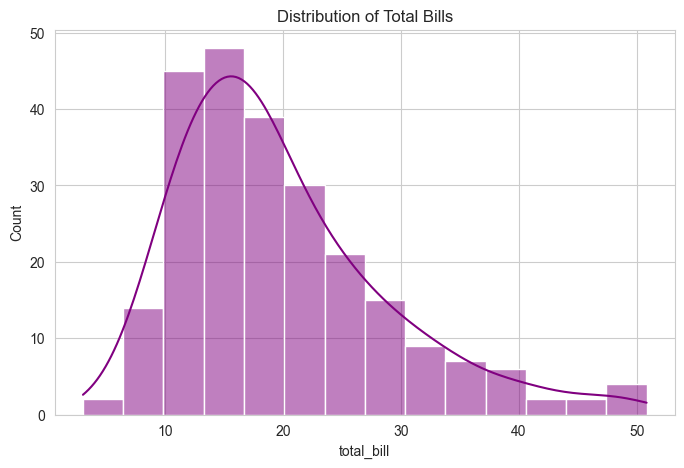

In [7]:
# Histogram + Probability Curve (KDE)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="total_bill", kde=True, color="purple")
plt.title("Distribution of Total Bills")
plt.show()

**Interpretation:** The curve extends to the right (Positively Skewed). This means most bills are low, with a few very high ones.

---
## 10.3. CATEGORICAL PLOTS

Used to compare different classes/groups.

**A) Bar Plot:** Compares means (averages).

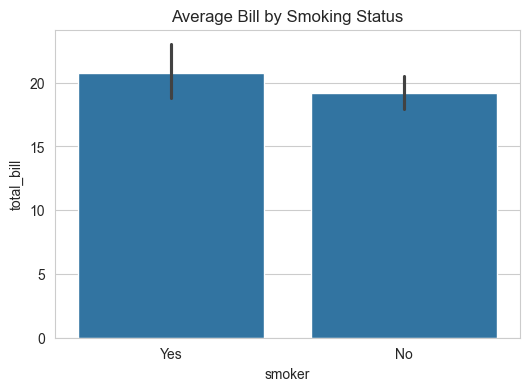

In [8]:
# Average bill for Smokers vs Non-Smokers
plt.figure(figsize=(6, 4))
sns.barplot(x="smoker", y="total_bill", data=df)
plt.title("Average Bill by Smoking Status")
plt.show()

**B) Box Plot:** Shows outliers. (Crucial in Engineering).

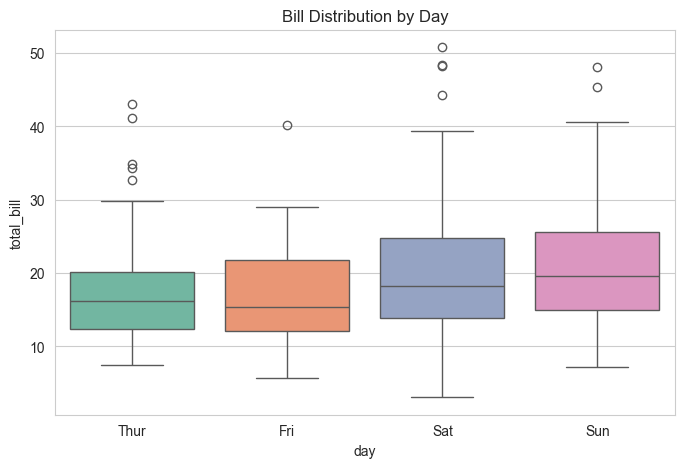

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="day", y="total_bill", data=df, hue="day", palette="Set2", legend=False)
plt.title("Bill Distribution by Day")
# The dots outside the whiskers are outliers (extreme customers).
plt.show()

**C) Violin Plot:** Detailed version of the box plot; shows the density (fatness) of the data.

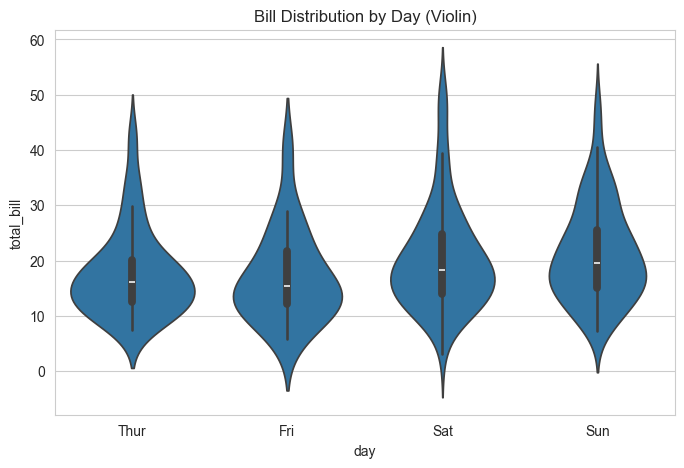

In [10]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="day", y="total_bill", data=df)
plt.title("Bill Distribution by Day (Violin)")
plt.show()

---
## 10.4. RELATIONAL PLOTS

Visualizing the relationship (Correlation) between two variables.

**A) Scatter Plot:**

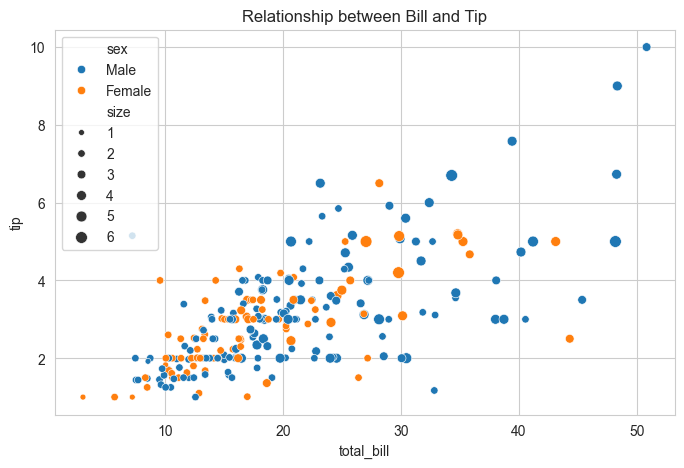

In [11]:
# Total Bill vs Tip
# hue="sex": Color code by gender.
plt.figure(figsize=(8, 5))
sns.scatterplot(x="total_bill", y="tip", data=df, hue="sex", size="size")
plt.title("Relationship between Bill and Tip")
plt.show()

**B) Heatmap:** Coloring the Correlation Matrix. (We saw this in Chapter 4, repeating here as it's Seaborn's most famous plot).

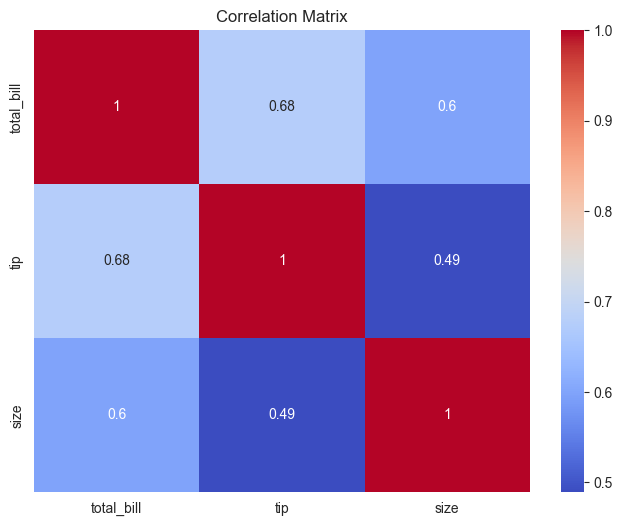

In [12]:
plt.figure(figsize=(8, 6))
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

**C) Pairplot:** X-Ray of the data. Compares all numerical variables against each other.

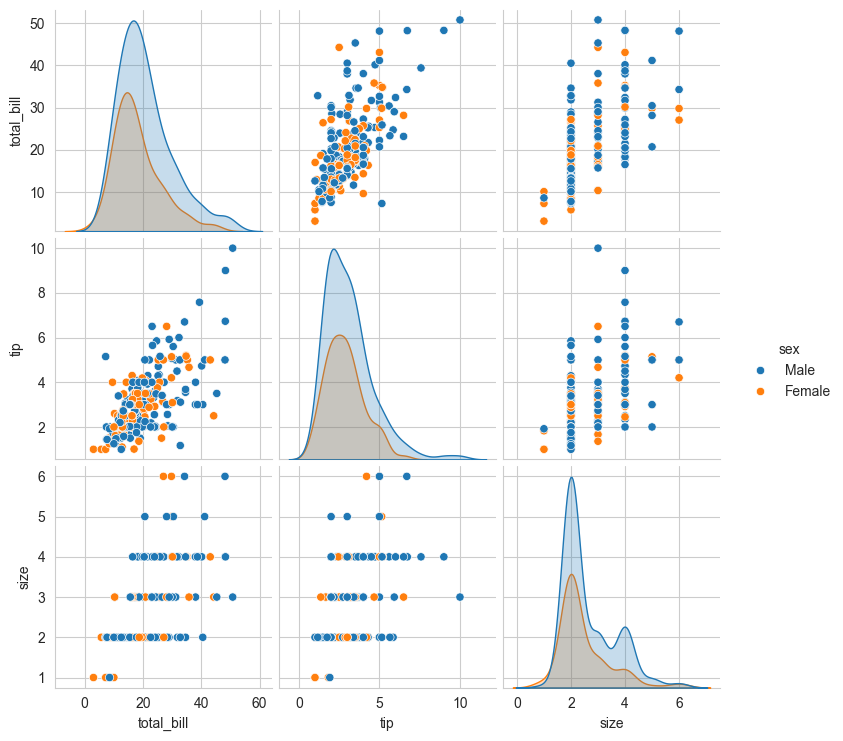

In [13]:
sns.pairplot(df, hue="sex")
plt.show()

---
## 3. ENGINEERING APPLICATION: SIGNAL VISUALIZATION

**Noisy Signal Analysis**

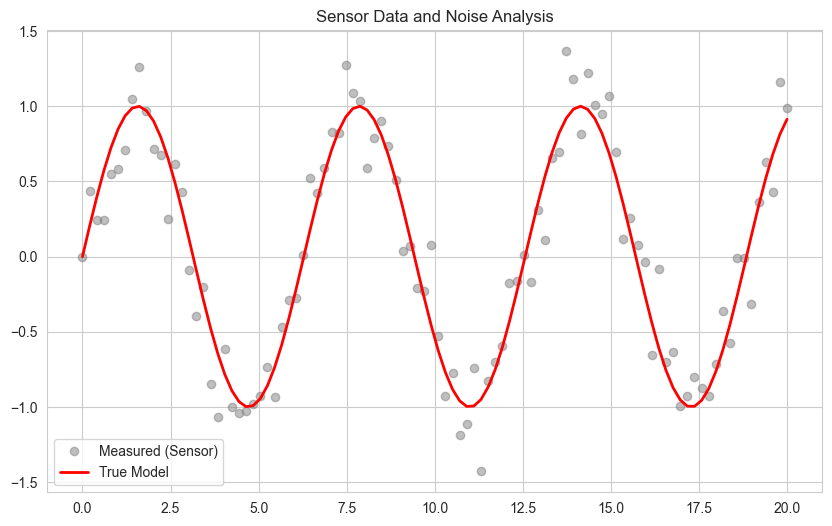

In [14]:
# 1. Generate Data (Sine Wave + Noise)
x = np.linspace(0, 20, 100)
clean_signal = np.sin(x)
noise = np.random.normal(0, 0.2, 100) # Normally distributed error
measured_signal = clean_signal + noise

# 2. Visualize
plt.figure(figsize=(10, 6))

# Measured (Dirty) Signal
plt.plot(x, measured_signal, 'o', color='gray', label='Measured (Sensor)', alpha=0.5)

# Real (Clean) Signal
plt.plot(x, clean_signal, 'r-', linewidth=2, label='True Model')

plt.title("Sensor Data and Noise Analysis")
plt.legend()
plt.show()

**Lesson:** "Friends, in the field you collect the gray dots. Using Data Science, you find the red line (the truth)." 

---
## 5. WEEKLY HOMEWORK (Challenge)

**Task:** Using the "Pokemon" dataset (or Titanic), create the following visuals:

1.  Draw a **Scatter Plot** showing Pokemon Attack vs. Defense stats. (Color the Legendary ones differently).
2.  Draw a **Bar Plot** showing the average speed of each Type 1. (If text overlaps, use `plt.xticks(rotation=45)`).
3.  Draw a **Histogram** showing the distribution of Attack power.
4.  Draw a **Heatmap** showing the correlation of all numerical features.